In [ ]:
# DATA MANIPULATION
import numpy as np # linear algebra
import random as rd
import pandas as pd # data processing
import datetime # manipulating date formats
from operator import add # elementwise addition

# VIZUALIZATION
import matplotlib.pyplot as plt # basic plotting
import seaborn # for prettier plots
#import folium # plotting data on interactive maps
%matplotlib inline

# SUPERVISED LEARNING
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Reading daily transfers per store
sales = pd.read_csv('C:/Users/AnupamaRatha/Desktop/a/working/transactions.csv', parse_dates=['date'])

# Reading store list
stores = pd.read_csv('C:/Users/AnupamaRatha/Desktop/a/working/stores.csv')
stores.type=stores.type.astype('category')

# Reading the holiday and events schedule
holidays=pd.read_csv('C:/Users/AnupamaRatha/Desktop/a/working/holidays_events.csv', parse_dates=['date'])

# Reading oil
oil=pd.read_csv('C:/Users/AnupamaRatha/Desktop/a/working/oil.csv', parse_dates=['date'])

# Merge datasets
def merge_sales(sales):
    sales=pd.merge(sales,stores,how='left')
    sales=pd.merge(sales,oil,how='left')
    return sales

sales = merge_sales(sales)

In [132]:
## Some features were not very useful: year,month,day

def add_date_features(df):
    #df['year'] = df['date'].dt.year
    #df['month'] = df['date'].dt.month
    #df['day'] = df['date'].dt.day
    df['week'] = df['date'].dt.week
    df['dow'] = df['date'].dt.dayofweek
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayoff']=[x in [5,6] for x in df.dow] ## Weekends

add_date_features(sales)
sales.head()

,date,store_nbr,transactions,city,state,type,cluster,dcoilwtico,dayoff,store_nbr_1,...,store_nbr_50,store_nbr_51,store_nbr_52,store_nbr_53,store_nbr_54,lag_7,lag_annual,week,dow,dayofyear
54,2013-01-02,1,7.655391,Quito,Pichincha,D,13.0,93.14,False,1.0,...,0.0,0.0,0.0,0.0,0.0,7.515264,7.092462,1,2,2
108,2013-01-03,1,7.514255,Quito,Pichincha,D,13.0,92.97,False,1.0,...,0.0,0.0,0.0,0.0,0.0,7.469764,7.379355,1,3,3
162,2013-01-04,1,7.530480,Quito,Pichincha,D,13.0,93.12,False,1.0,...,0.0,0.0,0.0,0.0,0.0,7.420793,6.166310,1,4,4
216,2013-01-05,1,7.319865,Quito,Pichincha,D,13.0,NaN,True,1.0,...,0.0,0.0,0.0,0.0,0.0,7.149516,7.222296,1,5,5
270,2013-01-06,1,6.255750,Quito,Pichincha,D,13.0,NaN,True,1.0,...,0.0,0.0,0.0,0.0,0.0,6.209820,7.279391,1,6,6


In [133]:
# Enable all holidays
def enable_holidays(sales):
    for (d,t,l,n) in zip(holidays.date,holidays.type,holidays.locale,holidays.locale_name):
        if t!='Work Day' and t!='Event':  
            if l=='National':
                sales.loc[sales.date==d,'dayoff']=True
            elif l=='Regional':
                sales.loc[(sales.date==d)&(sales.state==n),'dayoff']=True
            else:
                sales.loc[(sales.date==d)&(sales.city==n),'dayoff']=True
        else:
            sales.loc[(sales.date==d),'dayoff']=False

enable_holidays(sales)

In [134]:
## Some manual verifications
sales.loc[lambda df: df.date=='2015-01-10'].head()
#sales.loc[lambda df: (df.date=='2017-04-13') & (df.city=='Cuenca')].head()
#sales.loc[lambda df: (df.date=='2013-04-01') & (df.state=='Cotopaxi')].head()

,date,store_nbr,transactions,city,state,type,cluster,dcoilwtico,dayoff,store_nbr_1,...,store_nbr_50,store_nbr_51,store_nbr_52,store_nbr_53,store_nbr_54,lag_7,lag_annual,week,dow,dayofyear
39906,2015-01-10,1,7.336286,Quito,Pichincha,D,13.0,NaN,False,1.0,...,0.0,0.0,0.0,0.0,0.0,6.923629,7.170888,2,5,10
39907,2015-01-10,2,7.642044,Quito,Pichincha,D,13.0,NaN,False,0.0,...,0.0,0.0,0.0,0.0,0.0,7.514255,7.676474,2,5,10
39908,2015-01-10,3,8.189245,Quito,Pichincha,D,8.0,NaN,False,0.0,...,0.0,0.0,0.0,0.0,0.0,8.121183,8.198914,2,5,10
39909,2015-01-10,4,7.432484,Quito,Pichincha,D,9.0,NaN,False,0.0,...,0.0,0.0,0.0,0.0,0.0,7.367709,7.466799,2,5,10
39910,2015-01-10,5,7.406103,Santo Domingo,Santo Domingo de los Tsachilas,D,4.0,NaN,False,0.0,...,0.0,0.0,0.0,0.0,0.0,7.404279,7.365180,2,5,10


In [ ]:
# Transformation
def transform_transactions(sales):
    
    sales['transactions'] = np.log1p(sales.transactions)

transform_transactions(sales)

# Normalized
#sales['transactions3'] = (sales['transactions2'] - sales['transactions2'].mean()) / sales['transactions2'].std()
# Normalize independently 

# Histograms
#plt.figure(figsize=(15,5))
#sales.transactions.hist(ax=plt.subplot(1,3,1))
#sales.transactions2.hist(ax=plt.subplot(1,3,2))
#sales.transactions3.hist(ax=plt.subplot(1,3,3))

In [ ]:
# Denormalize
def denormalize_target(sales, target, transform=False):
    target_std = sales['transactions2'].std()
    target_mean = sales['transactions2'].mean()

    out = target * target_std + target_mean
    if transform:
        out = np.expm1(out)
    
    return out
    
#test = denormalize_target(sales, sales.transactions3, True)
#test.hist()

In [ ]:
def encode(df, column) -> pd.DataFrame:
    one_hot = pd.get_dummies(df[column], drop_first=False, prefix=column)
    #return (one_hot - one_hot.mean()) / one_hot.std()
    return one_hot

def encode_categorical_features(sales):
    cat_columns = ['store_nbr'] #['store_nbr','city', 'state', 'type']
    
    for column in cat_columns:
        column_enc = encode(sales, column)
        sales = pd.concat([sales,column_enc], axis=1)
    
    return sales


sales = encode_categorical_features(sales)

In [ ]:
print_cols = [c for c in sales.columns if 
             not c.startswith('store_nbr_') and 
             not c.startswith('city_') and 
             not c.startswith('state') and 
             not c.startswith('type_')]

In [ ]:
md = [(c,sales[c].isnull().sum()) for c in sales.columns]

for a in md:
    if a[1]>0:
        print(a)

In [ ]:
#u_dates = sales.date.unique() # There are no records for some dates (eg: 25-dic)
dates_range =  pd.date_range(sales.date.min(), sales.date.max())
u_stores = sales.store_nbr.unique()

def add_lag_features(sales):
    ''' 
    Creates two lags features: 
    - lag_7: weekly seasonality
    - lag_annual: annual seasonality
    
    Process: 
    The lag features arecreated by means of the shift method
    In orther to use the shift method, it is necessary to have complete and sorted time series
    Thus, it fills missing rows using a product between the stores and the dates (range min-max). 
    This allows to insert missing dates such as dec-25, which reports no record.
    
    The second stage fills missing lags, by means of annual/weekly aggregations
    '''
    sales2 = sales.copy()
    sales2.set_index(["date", "store_nbr"], inplace=True)
    sales2 = sales2.reindex(
        pd.MultiIndex.from_product(
            [dates_range, u_stores],
            names=["date", "store_nbr"]
        )
    )
    sales2.sort_index(inplace=True)
    #some_cols2 = [c for c in some_cols if c!='date' and c!='store_nbr']
    
    ## Lag 7
    sales2['lag_7']=np.nan
    sales2['lag_7']=sales2['transactions'].shift(7*len(u_stores))
    print(sales2[['transactions','lag_7']].corr())
    
    ## Lag 14
    #sales2['lag_14']=np.nan
    #sales2['lag_14']=sales2['transactions'].shift(14*len(u_stores))
    #print(sales2[['transactions','lag_14']].corr())
    #It did not reduce error metric
    
    ## Lag 364
    sales2['lag_annual']= np.nan
    sales2['lag_annual']= sales2['transactions'].shift(364*len(u_stores)).values
    print(sales2[['transactions','lag_annual']].corr())

    #sales2['lag_annual']= \
    #    (1 *   sales2['transactions2'].shift(364*len(u_stores)).values + 
    #     1.5 * sales2['transactions2'].shift(365*len(u_stores)).values + 
    #     1 *sales2['transactions2'].shift(366*len(u_stores)).values)/3.5
    # It was not better than (364 shift)

    ## Lag 364*2
    #sales2['lag_annual_']= np.nan
    #sales2['lag_annual_']= sales2['transactions'].shift(364*2*len(u_stores)).values
    #print(sales2[['transactions','lag_annual_']].corr())

    
    # Delete temporal df 
    sales = sales2.reset_index()
    del sales2
    
    # Drop nan in transactions column
    sales.dropna(subset=['transactions'], inplace=True)
    
        ### Stage 2
    
    ### Anual trend
    add_date_features(sales) # Update date-derived features after reIndex
    annual_trend = sales.groupby(['store_nbr','dayofyear']).transactions.agg('mean')
    
    ### Weekly trend
    sales['year'] = sales['date'].dt.year
    weekly_trend = sales.groupby(['store_nbr','year','dow']).transactions.agg('mean')

    #plt.figure(figsize=(15,7))
    #for s in sales.store_nbr.unique():
    #    plt.plot(annual_trend[s])

    ## Fill missing data
    for index, row in sales[sales.lag_annual.isnull()].iterrows():
        sales.loc[index,'lag_annual'] = annual_trend[(row.store_nbr,row.dayofyear)]

    for index, row in sales[sales.lag_7.isnull()].iterrows():
        sales.loc[index,'lag_7'] = weekly_trend[(row.store_nbr,row.year,row.dow)]

    sales.drop('year',1, inplace=True) # Drop temporal feature
    
    return sales


sales = add_lag_features(sales)

In [ ]:
print_cols = print_cols+[c for c in sales.columns if c.startswith('lag_')]

In [ ]:
### Drop nan and sort data
###There is lots of them because of the creation of the lag features

def clean_data_for_prediction(df):
    # Drop
    #print('Dropping nan rows...')
    #print("Before: ", df.shape)
    #df.dropna(inplace=True)
    #print("After: ", df.shape)
    
    # Sort
    print('Sorting')
    df.sort_values(['store_nbr', 'date'], ascending=[True, True], inplace=True)
    df = df.reindex()
    
    return df


sales = clean_data_for_prediction(sales)

## save processed dataset
sales[[c for c in sales.columns if not c.startswith('store_nbr_')]].to_csv('C:/Users/AnupamaRatha/Desktop/a/working/sales+.csv',index=False)

In [ ]:
X1 = sales.loc[(sales.date<'2017-08-01') & (sales.date>='2016-01-01')].copy()
X2 = sales.loc[sales.date>='2017-08-01'].copy()

target_column = 'transactions' 
y1 = X1[target_column].values
y2 = X2[target_column].values

In [ ]:
#sc_ = [c for c in sales.columns if c.startswith('store_nbr_')]
#sc = [c for c in sales.columns if c.startswith('state_')]
#cc = [c for c in sales.columns if c.startswith('city_')]
#tc = [c for c in sales.columns if c.startswith('type_')]
cols = [c for c in X1 if c not in ['date','store_nbr','type','city','state',
                                   'transactions','transactions2', 'cluster']]
cols

#drop_cols = ['city','state','type','cluster', 'transactions2', 'transactions3'] + \
#            [c for c in sales.columns if c.startswith("state_") or c.startswith("type_") or c.startswith("city_")]

In [122]:
from sklearn import metrics

np.random.seed(112)

number_regressors_to_test = 3
for method in range(1, number_regressors_to_test+1):
    print('\nmethod = ', method)
    
    if (method==1):
        print('Multilayer perceptron (MLP) neural network 01')
        str_method = 'MLP model01'    
        r = MLPRegressor(hidden_layer_sizes=(3,), max_iter=10)
    if (method==2):
        print('Bagging Regressor 01')
        str_method = 'BaggingRegressor01'
        r = BaggingRegressor(DecisionTreeRegressor(max_depth=6,max_features=0.05))

    if (method==3):
        np.random.seed(112)
        print('GradientBoosting 01')
        str_method = 'GradientBoosting01'
        r = GradientBoostingRegressor()        

    r.fit(X1[cols], y1)
    yh2 = r.predict(X2[cols])
    X2['prediction_%d'%method] = yh2
    m = metrics.mean_squared_error(y2, yh2)**0.5

    print("Error: %f" % (m))


method =  1
Multilayer perceptron (MLP) neural network 01


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

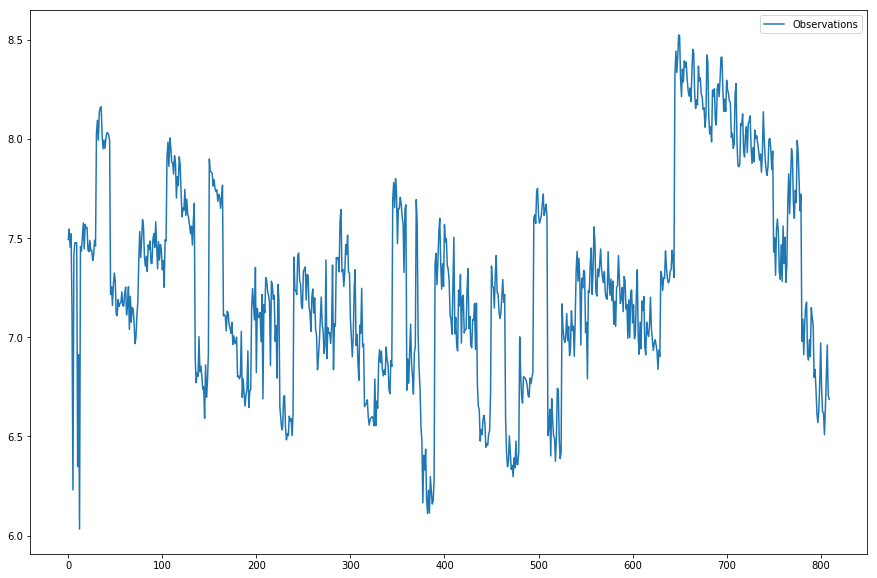

In [120]:
ts  = pd.Series(X2[target_column].values)

plt.figure(figsize=(15,10))
plt.plot(ts, label='Observations')

for c in [c for c in X2.columns if c.startswith("prediction_")]:
    ts_p = pd.Series(X2[c].values)
    plt.plot(ts_p,label=c)

plt.legend()

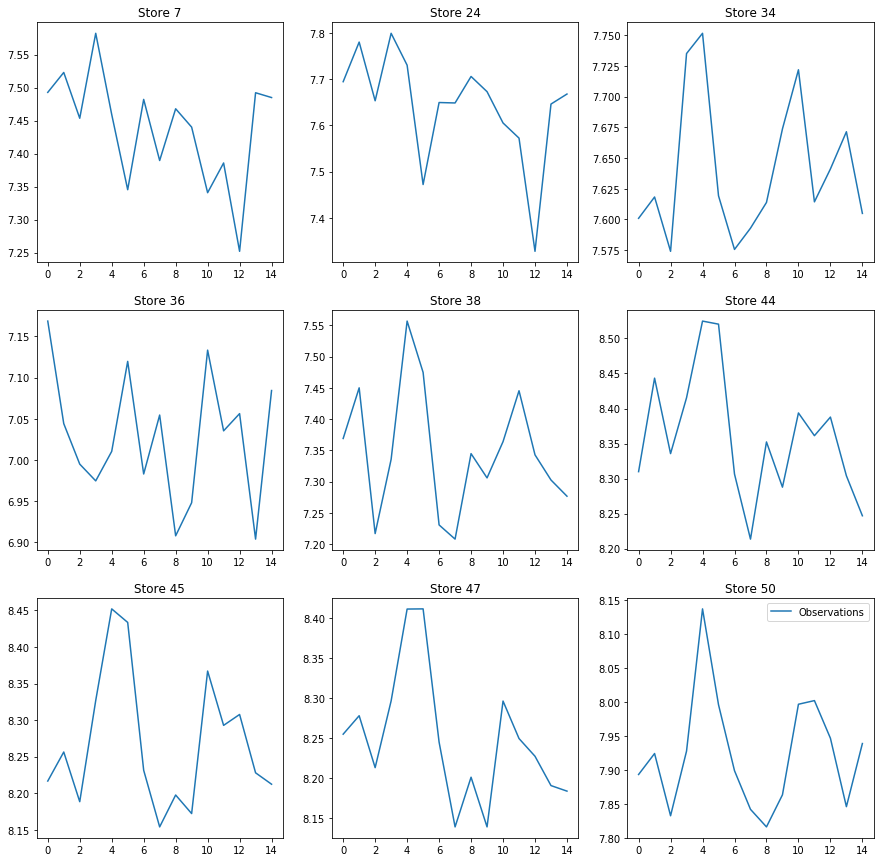

In [123]:
import random
random_stores =  sorted(u_stores[random.sample(range(len(u_stores)), 9) ])

plt.figure(figsize=(15,15))

for i in range(len(random_stores)):
    ax1 = plt.subplot(3,3,i+1)
    a_store = X2[X2.store_nbr==random_stores[i]]
    ts = pd.Series(a_store[target_column].values) # , index = a_store.date
    ax1.plot(ts, label='Observations')
    
    for c in [c for c in X2.columns if c.startswith("prediction_")]:
        ts_p = pd.Series(a_store[c].values) # , index = a_store.date
        ax1.plot(ts_p,label=c)

    plt.title('Store {}'.format(random_stores[i]))

plt.legend()

In [127]:
## Train best method
np.random.seed(122)
#r = BaggingRegressor(DecisionTreeRegressor(max_depth=6,max_features=0.05))   
r = MLPRegressor(hidden_layer_sizes=(3,), max_iter=10)
r.fit(X1[cols], y1)
yh2 = r.predict(X2[cols])
m = metrics.mean_squared_error(y2, yh2)**0.5
print("Error: %f" % (m))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [128]:
## Create initial dataset
dates_range =  pd.date_range('2017-08-16', '2017-08-31')

a = pd.DataFrame({'date':dates_range, 'key':0})
b = pd.DataFrame({'store_nbr':sorted(u_stores), 'key':0})

X3 = a.merge(b, how='outer').drop('key',1)

## Pre-processing
X3 = merge_sales(X3)
add_date_features(X3)
enable_holidays(X3)
X3 = encode_categorical_features(X3)

In [23]:

## Original data for the lag features
sales_0 = pd.read_csv('../input/transactions.csv', parse_dates=['date'])
transform_transactions(sales_0)


## Special treatment for store #52
## Since store #52 only has records from 2017-04-20, the annual lag feature will be obtained from a weekly average
s52 = sales_0[ sales_0.store_nbr==52][['date','transactions']]
s52['dow'] = s52.date.dt.dayofweek
w_trend = s52.groupby('dow').transactions.agg('mean')

## Method for creating lag features at a single day
def get_lag_features(X3, a_date):
    for index, row in X3[X3.date==a_date].iterrows():
        #print(index)
        #print(row.date)
        #print((row.date-datetime.timedelta(days=7)))
        #print(sales[(sales.store_nbr==1) & (sales.date==(row.date-datetime.timedelta(days=7)))])

        ## Get lag_7
        tmp = sales_0[(sales_0.store_nbr==row.store_nbr) & 
                      ((sales_0.date==(row.date-datetime.timedelta(days=7))) | 
                       (sales_0.date==(row.date-datetime.timedelta(days=7*2)))) ]['transactions']

        if(len(tmp)>0):
            X3.loc[index,'lag_7'] = tmp.iloc[-1]
        else:
            if row.store_nbr==52:
                X3.loc[index,'lag_annual'] = w_trend[row.dow]
            else:
                print("Missing lag_7 for : (%d,%s,%s)"% (row.store_nbr,row.date,row.date-datetime.timedelta(days=7)))
                raise Exception('debug this!')

        ## Get lag_annual
        tmp = sales_0[(sales_0.store_nbr==row.store_nbr) & 
                      ((sales_0.date==(row.date-datetime.timedelta(days=364))) | 
                       (sales_0.date==(row.date-datetime.timedelta(days=364*2)))) ]['transactions']

        if(len(tmp)>0):
            X3.loc[index,'lag_annual'] = tmp.iloc[-1]
        else:

            if row.store_nbr==52:
                X3.loc[index,'lag_annual'] = w_trend[row.dow]
            else:
                print("Missing lag_annual for : (%d,%s,%s)"% (row.store_nbr,row.date,row.date-datetime.timedelta(days=364)))
                raise Exception('debug this!')



SyntaxError: invalid syntax (<ipython-input-128-c1bfb9ec4d0f>, line 15)

In [129]:
cols

['dcoilwtico',
 'dayoff',
 'store_nbr_1',
 'store_nbr_2',
 'store_nbr_3',
 'store_nbr_4',
 'store_nbr_5',
 'store_nbr_6',
 'store_nbr_7',
 'store_nbr_8',
 'store_nbr_9',
 'store_nbr_10',
 'store_nbr_11',
 'store_nbr_12',
 'store_nbr_13',
 'store_nbr_14',
 'store_nbr_15',
 'store_nbr_16',
 'store_nbr_17',
 'store_nbr_18',
 'store_nbr_19',
 'store_nbr_20',
 'store_nbr_21',
 'store_nbr_22',
 'store_nbr_23',
 'store_nbr_24',
 'store_nbr_25',
 'store_nbr_26',
 'store_nbr_27',
 'store_nbr_28',
 'store_nbr_29',
 'store_nbr_30',
 'store_nbr_31',
 'store_nbr_32',
 'store_nbr_33',
 'store_nbr_34',
 'store_nbr_35',
 'store_nbr_36',
 'store_nbr_37',
 'store_nbr_38',
 'store_nbr_39',
 'store_nbr_40',
 'store_nbr_41',
 'store_nbr_42',
 'store_nbr_43',
 'store_nbr_44',
 'store_nbr_45',
 'store_nbr_46',
 'store_nbr_47',
 'store_nbr_48',
 'store_nbr_49',
 'store_nbr_50',
 'store_nbr_51',
 'store_nbr_52',
 'store_nbr_53',
 'store_nbr_54',
 'lag_7',
 'lag_annual',
 'week',
 'dow',
 'dayofyear']

In [131]:
## Create lag_features and predict one day at a time
X3['lag_7'] = np.nan
X3['lag_annual'] = np.nan
X3['transactions'] = np.nan

## For each date: (1) Create lag_features, (2) Predict transactions
for a_date in dates_range:
    #a_date = dates_range[0]
    get_lag_features(X3, a_date) # Add lag features
    yh_3 = r.predict(X3[X3.date==a_date][cols]) # Predict
    X3.loc[X3.date==a_date, 'transactions'] = yh_3
    sales_0 = pd.concat([sales_0,X3[X3.date==a_date][['date','store_nbr','transactions']]]) # Append to historical

NameError: name 'X3' is not defined